# 1. Logistic regression

## Univariate gaussian data generator

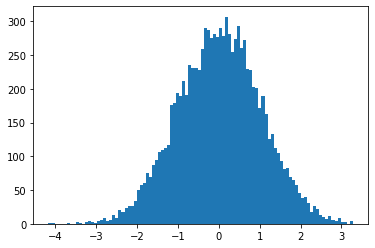

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def Gaussian_random_generator(mu=0, var=1, size=1):
    total = []
    for i in range(size):
        total.append(mu+ var**(0.5)*(np.sum(np.random.uniform(0, 1, 12))-6))
    return np.array(total)

test_points = Gaussian_random_generator(0, 1, 10000)
_ = plt.hist(test_points, bins=100)

## 2 sets of data generator

In [2]:
def Gaussian_random_generator_2sets(N, mx1, my1, mx2, my2, vx1, vy1, vx2, vy2):
    """
    Input
        N: Number of data points
        mx1, my1: First dataset (x,y) position mean
        mx2, my2: Second dataset (x,y) position mean
        vx1, vy1: First dataset (x,y) position variance
        vx2, vy2: Second dataset (x,y) position variance
        
    Return
        D1: First dataset (N,2)
        D2: Second dataset (N,2)
    """ 
    x1 = Gaussian_random_generator(mu=mx1, var=vx1, size=N)
    y1 = Gaussian_random_generator(mu=my1, var=vx1, size=N)
    
    x2 = Gaussian_random_generator(mu=mx2, var=vx2, size=N)
    y2 = Gaussian_random_generator(mu=my2, var=vy2, size=N)
    return np.column_stack((x1,y1)), np.column_stack((x2,y2))

## Gradient Descent
$\mathbf{w}_{\mathrm{n}+1}=\mathbf{w}_{\mathrm{n}}+\nabla_{\mathrm{w}} J$


$\mathbf{w}_{\mathrm{n}+1}=\mathbf{w}_{\mathrm{n}}+\nabla_{\mathrm{m}} J=\mathbf{w}_{\mathrm{n}}+X^{T}\left(y_{i}-\frac{1}{1+e^{-X_{\mathrm{IW}}}}\right)$

## Newton Method
$x_{1}=x_{0}-\frac{f^{\prime}\left(x_{0}\right)}{f^{\prime \prime}\left(x_{0}\right)}=x_{0}-H f(x)^{-1} \nabla f\left(x_{0}\right)$

$H(J)=A^{T} D A$

In [3]:
def Features_combine_bias_add(Data1, Data2):
    """
    Input
        D1: Ground Truth Data 1 (50,2)
        D2: Ground Truth Data 2 (50,2)
        
    Return
        X: Data with D1 & D2 combined and bias added (100,3)
        Y: Labels (100,1)
    """ 
    N = len(Data1) # 50 points
    bias = np.ones((N,1))
    D1 = np.hstack((bias,Data1))
    D2 = np.hstack((bias,Data2))
    X = np.vstack((D1,D2))
    
    y1 = np.zeros((N,1)) # Labels for Data1
    y2 = np.ones((N,1)) # Labels for Data2
    Y = np.vstack((y1,y2))
    
    return X, Y

def Logistic_Regression_Gradient_descent(X, y, w, lr=0.01, epislon=1e-7, max_interation=5000):
    """
    Input
        X: Features (100,3)
        y: Labels (100,1)
        w: Weights (3,1)
        lr: learning rate
        epislon: minimum error
        
    Return
        w: New weights (3,1)
    """
    iteration = 0
    loss = X.T @ (y-(1 / (1+np.exp(-X@w))))
    while np.sum(loss**2)**0.5 > epislon and iteration < max_interation:
        loss = X.T @ (y-(1 / (1+np.exp(-X@w))))
        w = w + lr*loss
        iteration += 1
        
    return w

def Logistic_Regression_Newton_method(X, y, w, lr=0.001, epislon=1e0, max_interation=5000):
    """
    Input
        X: Features (100,3)
        y: Labels (100,1)
        w: Weights (3,1)
        lr: learning rate
        epislon: minimum error
        
    Return
        w: New weights (3,1)
    """    
    N = len(X)
    D = np.zeros((N,N))
    for i in range(N):
        D[i,i] = np.exp(-X[i]@w) / (1+np.exp(-X[i]@w))**2
    H = X.T@ D @ X
    
    try: 
        H_inv = np.linalg.inv(H)
    except np.linalg.LinAlgError as E:
        print(f'{E}')
        print('The Hessian Matrix is Non Invertible')
        return Logistic_Regression_Gradient_descent(X, y, w)

    iteration = 0
    loss = H_inv @ X.T @ (y-(1 / (1+np.exp(-X@w))))
    while np.sum(loss**2)**0.5 > epislon and iteration < max_interation:
        loss = H_inv@ X.T @ (y-(1 / (1+np.exp(-X@w))))
        w = w + lr* loss    
        iteration += 1
    
    return w

def draw(D1, D2, X, prediction_gd, prediction_nm):
    """
    Input
        D1: Ground Truth Data 1 (50,2)
        D2: Ground Truth Data 2 (50,2)
        prediction_gd: Gradient Descent Predict Data(100,3)
        prediction_nm: Newton Method Predction Data (100,3) 
    """
    plt.subplot(1,3,1)
    plt.title('Ground truth')
    plt.scatter(D1[:,0], D1[:,1], c='r')
    plt.scatter(D2[:,0], D2[:,1], c='b')
    plt.xlim(np.min(X[:,1])-1, np.max(X[:,1])+1)

    plt.subplot(1,3,2)
    plt.title('Gradient descent')
    Data_gd_label0 = X[np.tile(prediction_gd,3)==0].reshape(-1,3)
    Data_gd_label1 = X[np.tile(prediction_gd,3)==1].reshape(-1,3)
    plt.scatter(Data_gd_label0[:,1], Data_gd_label0[:,2], c='r')
    plt.scatter(Data_gd_label1[:,1], Data_gd_label1[:,2], c='b')
    plt.xlim(np.min(X[:,1])-1, np.max(X[:,1])+1)

    plt.subplot(1,3,3)
    plt.title('Newton\'s method')
    Data_nm_label0 = X[np.tile(prediction_nm,3)==0].reshape(-1,3)
    Data_nm_label1 = X[np.tile(prediction_nm,3)==1].reshape(-1,3)
    plt.scatter(Data_nm_label0[:,1], Data_nm_label0[:,2], c='r')
    plt.scatter(Data_nm_label1[:,1], Data_nm_label1[:,2], c='b')
    plt.xlim(np.min(X[:,1])-1, np.max(X[:,1])+1)
    
    plt.tight_layout()

### Case 1: N=50, 
### mx1 = my1  = 1, mx2 = my2 = 10,
### vx1 = vy1 = vx2 = vy2 = 2

In [4]:
D1, D2 = Gaussian_random_generator_2sets(50, 1, 1, 10, 10, 2, 2, 2, 2)
X, Y = Features_combine_bias_add(D1,D2)
initial_w = Gaussian_random_generator(mu=0, var=10, size=3).reshape(3,1)
initial_w

array([[-2.18401458],
       [ 0.59862841],
       [ 0.35132669]])

Gradient descent:

w:
-10.72106801470556
0.8576667990836105
1.3332953873237992

Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1        50                0
Is cluster 2        0                50

Sensitivity (Successfully predict cluster 1): 1.0
Specificity (Successfully predict cluster 2): 1.0

-----------------------------------------

Newton's methond:

w:
-2.4659451674479183
0.5478338604424077
0.3537766391366269

Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1        50                0
Is cluster 2        1                49

Sensitivity (Successfully predict cluster 1): 1.0
Specificity (Successfully predict cluster 2): 0.98


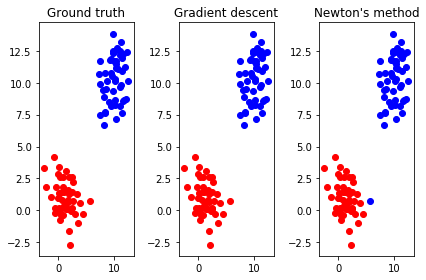

In [5]:
w_gd = Logistic_Regression_Gradient_descent(X, Y, initial_w, lr=0.01)

print('Gradient descent:\n')
print('w:')
for i in w_gd:
    print(float(i))
print('')

prediction_gd = X@w_gd
prediction_gd = np.where(prediction_gd>=0, 1, prediction_gd)
prediction_gd = np.where(prediction_gd<0, 0 , prediction_gd)
TP = TN = FP = FN = 0
for idx, p in enumerate(prediction_gd):
    if p==Y[idx] and p==1:
        TP+=1
    elif p==Y[idx] and p==0:
        TN+=1
    elif p!=Y[idx] and p==1:
        FP+=1
    else:
        FN+=1

print('Confusion Matrix:')
print(f'{"":<13}Predict cluster 1 Predict cluster 2')
print(f'Is cluster 1{"":8}{TP}{"":16}{FN}')
print(f'Is cluster 2{"":8}{FP}{"":16}{TN}')
      
print('')
print(f'Sensitivity (Successfully predict cluster 1): {TP/(TP+FN)}')
print(f'Specificity (Successfully predict cluster 2): {TN/(TN+FP)}')

      
print('\n-----------------------------------------\n')      

      
w_nm = Logistic_Regression_Newton_method(X, Y, initial_w)
      
print('Newton\'s methond:\n')
print('w:')
for i in w_nm:
    print(float(i))
print('')

prediction_nm = X@w_nm
prediction_nm = np.where(prediction_nm>=0, 1, prediction_nm)
prediction_nm = np.where(prediction_nm<0, 0 , prediction_nm)
TP = TN = FP = FN = 0
for idx, p in enumerate(prediction_nm):
    if p==Y[idx] and p==1:
        TP+=1
    elif p==Y[idx] and p==0:
        TN+=1
    elif p!=Y[idx] and p==1:
        FP+=1
    else:
        FN+=1

print('Confusion Matrix:')
print(f'{"":<13}Predict cluster 1 Predict cluster 2')
print(f'Is cluster 1{"":8}{TP}{"":16}{FN}')
print(f'Is cluster 2{"":8}{FP}{"":16}{TN}')
      
print('')
print(f'Sensitivity (Successfully predict cluster 1): {TP/(TP+FN)}')
print(f'Specificity (Successfully predict cluster 2): {TN/(TN+FP)}')

draw(D1, D2, X, prediction_gd, prediction_nm)

### Case 2: N=50, 
### mx1 = my1  = 1, mx2 = my2 = 3,
### vx1 = vy1 = 2,
### vx2 = vy2 = 4

In [6]:
D1, D2 = Gaussian_random_generator_2sets(50, 1, 1, 3, 3, 2, 2, 4, 4)
X, Y = Features_combine_bias_add(D1,D2)
initial_w = Gaussian_random_generator(mu=0, var=10, size=3).reshape(3,1)
initial_w

array([[ 3.17790295],
       [-4.129315  ],
       [ 0.55372053]])

Gradient descent:

w:
-3.2426027184017867
0.8862017495568038
0.7877411696309913

Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1        42                8
Is cluster 2        9                41

Sensitivity (Successfully predict cluster 1): 0.84
Specificity (Successfully predict cluster 2): 0.82

-----------------------------------------

Newton's methond:

w:
-2.816446583188545
0.8082059602220807
0.6640136304550206

Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1        43                9
Is cluster 2        7                41

Sensitivity (Successfully predict cluster 1): 0.8269230769230769
Specificity (Successfully predict cluster 2): 0.8541666666666666


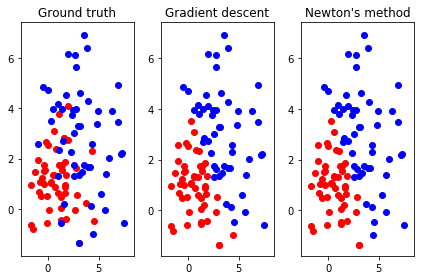

In [7]:
w_gd = Logistic_Regression_Gradient_descent(X, Y, initial_w, lr=0.01)

print('Gradient descent:\n')
print('w:')
for i in w_gd:
    print(float(i))
print('')

prediction_gd = X@w_gd
prediction_gd = np.where(prediction_gd>=0, 1, prediction_gd)
prediction_gd = np.where(prediction_gd<0, 0 , prediction_gd)
TP = TN = FP = FN = 0
for idx, p in enumerate(prediction_gd):
    if p==Y[idx] and p==1:
        TP+=1
    elif p==Y[idx] and p==0:
        TN+=1
    elif p!=Y[idx] and p==1:
        FP+=1
    else:
        FN+=1

print('Confusion Matrix:')
print(f'{"":<13}Predict cluster 1 Predict cluster 2')
print(f'Is cluster 1{"":8}{TP}{"":16}{FN}')
print(f'Is cluster 2{"":8}{FP}{"":16}{TN}')
      
print('')
print(f'Sensitivity (Successfully predict cluster 1): {TP/(TP+FN)}')
print(f'Specificity (Successfully predict cluster 2): {TN/(TN+FP)}')

      
print('\n-----------------------------------------\n')      

      
w_nm = Logistic_Regression_Newton_method(X, Y, initial_w)
      
print('Newton\'s methond:\n')
print('w:')
for i in w_nm:
    print(float(i))
print('')

prediction_nm = X@w_nm
prediction_nm = np.where(prediction_nm>=0, 1, prediction_nm)
prediction_nm = np.where(prediction_nm<0, 0 , prediction_nm)
TP = TN = FP = FN = 0
for idx, p in enumerate(prediction_nm):
    if p==Y[idx] and p==1:
        TP+=1
    elif p==Y[idx] and p==0:
        TN+=1
    elif p!=Y[idx] and p==1:
        FN+=1
    else:
        FP+=1

print('Confusion Matrix:')
print(f'{"":<13}Predict cluster 1 Predict cluster 2')
print(f'Is cluster 1{"":8}{TP}{"":16}{FN}')
print(f'Is cluster 2{"":8}{FP}{"":16}{TN}')
      
print('')
print(f'Sensitivity (Successfully predict cluster 1): {TP/(TP+FN) if TP+FN!=0 else 0}')
print(f'Specificity (Successfully predict cluster 2): {TN/(TN+FP) if TN+FP!=0 else 0}')

draw(D1, D2, X, prediction_gd, prediction_nm)